# Titanic Survival Prediction

## 1) Data acquisition
Download the data from this link : https://www.kaggle.com/c/titanic/data

In [70]:
import pandas as pd

df_train = pd.read_csv('data/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2) Data description
Try to get the main information about the dataset

In [72]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3) Exploratory data analysis
For every data science project, the most important part is understanding the data.
Exploratory data anaylysis is an analysis approach that identifies general patterns in the data. Try to learn as much as you can about the dataset :

In [73]:
# TO-DO : Separate the dataset to 2 dataset : one for numerical data and one for categorical data
colonnes_numeriques = ['PassengerId', 'Survived', 'Pclass','Age',  'SibSp', 'Parch', 'Fare']
colonnes_categoriques = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
df_num = df_train.loc[:, colonnes_numeriques]
df_cat = df_train.loc[:, colonnes_categoriques]
df_cat

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [74]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


<ipython-input-75-d79fd6365b35>:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_num.loc[:, ['Pclass','Age',  'SibSp', 'Parch', 'Fare']].hist(ax=ax, bins=30, alpha=0.5, color='blue', edgecolor='black')


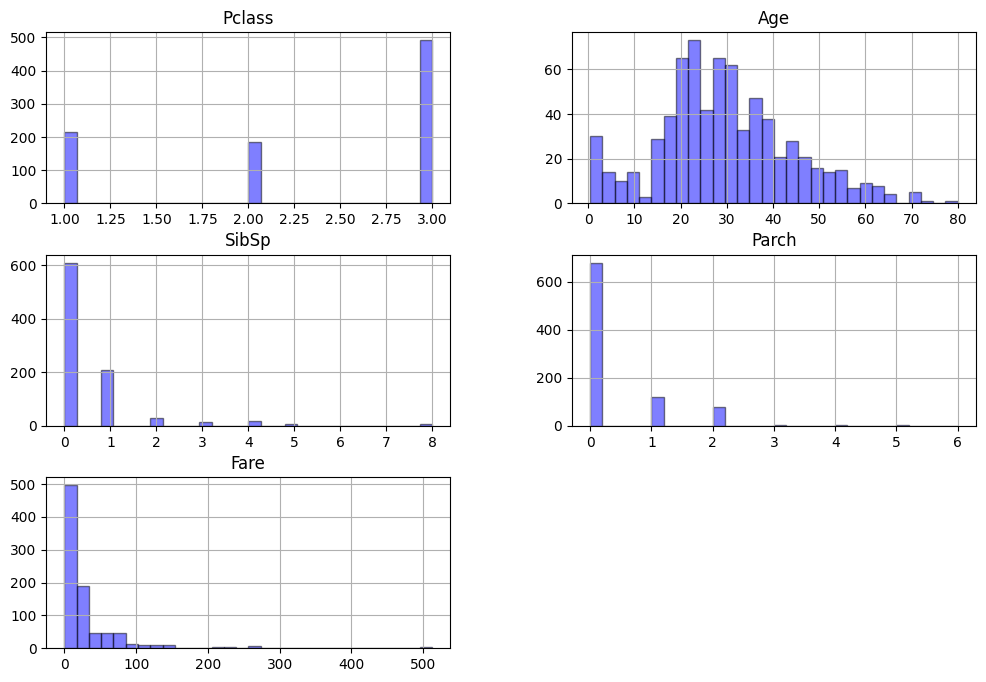

In [75]:
# TO-DO : Using matplotlib histograms, draw the distributions for numerical data
import matplotlib.pyplot as plt

# Créer la fugure et l'axe x
fig, ax = plt.subplots(figsize=(12, 8))

# Afficher l'histogramme de chaque colonne
df_num.loc[:, ['Pclass','Age',  'SibSp', 'Parch', 'Fare']].hist(ax=ax, bins=30, alpha=0.5, color='blue', edgecolor='black')

# Ajouter les titres
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogremme des données numériques')

# Les légendes
plt.legend(df_num.columns)

plt.show()

In [76]:
# TO-DO : Using seaborn, draw the heatmap for the correlation matrix and explain its role
import seaborn as sns

In [77]:
print(df_num.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


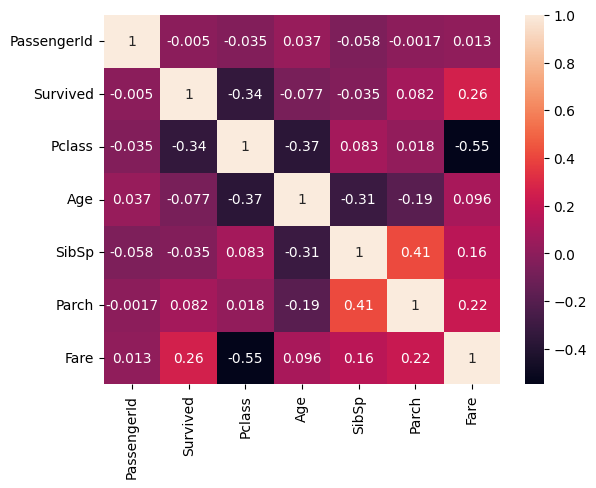

In [78]:
sns.heatmap(df_num.corr(),annot=True);

# **Commentaire 1:**  
###_La matrice de corrélation nous montre le niveau (entre -1 et 1) auquel une variable influence une autre. On remarque par exemple que le descripteurs "Pclass" et "Fare" sont négativement corrélés._

In [79]:
# TO-DO :
    # Look up pivot tables in pandas and explain what they do
    # draw them for the numerical variables with a mean aggrregation
df_pivot_moyen = pd.pivot_table(df_num, values=df_num.columns, columns='Survived', aggfunc='mean')

# Afficher la table pivotante
print(df_pivot_moyen)


Survived              0           1
Age           30.626179   28.343690
Fare          22.117887   48.395408
Parch          0.329690    0.464912
PassengerId  447.016393  444.368421
Pclass         2.531876    1.950292
SibSp          0.553734    0.473684


In [80]:
# TO-DO : Using sns barplot, draw the barplots for the categorical variables


In [81]:
# TO-DO :
    # Create the pivot table for the categorical variables for which it makes sense
    # Explain why it doesn not make sense for the others
df_cat_stage=df_cat
df_cat_stage['Survived']=df_num['Survived']
df_cat_stage['PassengerId']=df_num['PassengerId']
df_cat_pivot = pd.pivot_table(df_cat_stage, values=df_cat.columns, columns='Survived', aggfunc='count')
df_cat_pivot


Survived,0,1
Cabin,68,136
Embarked,549,340
Name,549,342
PassengerId,549,342
Sex,549,342
Ticket,549,342


# **Commentaire 2:**  
###_WIP_

In [82]:
df_cat_pivot_sex = pd.pivot_table(df_cat, values='PassengerId', index='Survived',columns='Sex', aggfunc='count')
df_cat_pivot_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


# **Commentaire 3:**  
###_Les femmes ont plus survécu au naufrage, ceci est sûrement dû au fait qu'elles et les enfants ont été sauvés en priorité_


In [83]:
df_cat_pivot_sex = pd.pivot_table(df_cat, values='PassengerId', index='Survived',columns='Embarked', aggfunc='count')
df_cat_pivot_sex

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [84]:
# TO-DO :
    # Explore the variable Cabin's values
    # Can we use this variable directly? if not, how can we exploit it efficiently


In [85]:
df_cat_pivot_cab = pd.pivot_table(df_cat, values='PassengerId', index='Survived',columns='Cabin', aggfunc='size')
df_cat_pivot_cab

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,...,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
Survived,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,2.0,1.0,NaN,1.0,NaN,2.0,1.0
1,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,...,2.0,1.0,NaN,NaN,2.0,3.0,NaN,2.0,2.0,NaN


# **Commentaire 4:**  
###_Non, la variable ne peut être exploitée directement(elle n'est ni numérique ni catégorielle). Il faudra la transformer avec de la data Engineering_


## 4) Data Engineering
When exploiting datasets, data engineering is an important preprocessing step. Its goal is to extract more information from the data so to increase the predictive power of the machine learning model.
Identify some variables on which we can apply data engineering and explain what type of information can be extratced from them.

In [86]:
# Here is an example of data engineering from the variable Cabin, we used it to create a new variable called Cabin_multiple that contains the number of cabins per passenger.
df_train['Cabin_multiple'] = df_train.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: Cabin_multiple, dtype: int64

In [87]:
group_cab=df_train.loc[df_train['Cabin'].notna()].groupby('Cabin').size()
grouped_cab_df = group_cab.reset_index(name='Nombre de personnes')
grouped_cab_df

,Cabin,Nombre de personnes
0,A10,1
1,A14,1
2,A16,1
3,A19,1
4,A20,1
...,...,...
142,F33,3
143,F38,1
144,F4,2
145,G6,4


In [88]:
# TO-DO : Create the pivot table for the newly created attribute.
df_cat_pivot_cab_mul = pd.pivot_table(df_train, values='PassengerId', index='Survived',columns='Cabin_multiple', aggfunc='size')
df_cat_pivot_cab_mul

Cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


# **Commentaire 5:**  
###_Nous avons ici 4 classes de personnes_
- Les passagers de la classe 0 sont 687 (il s'agit des voyageurs qui n'ont pas de numéro de cabine)
- Les passagers de la classe 1 sont 180 et sont seule dans leur cabine
- Les passagers de la classe 2 sont 16 et sont 2 par cabines
- Les passagers de la classe 3 sont 6 et sont 3 par cabines
- Dans la classe 4 nous avons 2 cabines qui abritent 4 personnes

# **Commentaire 6:**
###_On remarque de ce pivot que les passagers de classe 4 ont survécu, tandis que plus de 2/3 des passagers de la classe 0 sont décédés._

In [89]:
# TO-DO : Create the variables you think might be interesting then draw the pivot tables for the variables you create


In [90]:
df_train['Ticket_multiple'] = df_train.Ticket.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
df_train['Ticket_multiple'].value_counts()

1    665
2    213
3     13
Name: Ticket_multiple, dtype: int64

In [91]:
df_cat_pivot_ticket_multiple = pd.pivot_table(df_train, values='PassengerId', index='Survived',columns='Ticket_multiple', aggfunc='size')
df_cat_pivot_ticket_multiple

Ticket_multiple,1,2,3
Survived,,,
0,410,132,7
1,255,81,6


# **Commentaire 7: Ticket_multiple**
###_Il se dégage de la variable ticket 3 classes_

In [92]:
df_train['Title'] = df_train['Name'].apply(lambda name: name.split(', ')[1].split('. ')[0])

In [93]:
df_cat_pivot_title = pd.pivot_table(df_train, values='PassengerId', index='Survived',columns='Title', aggfunc='count')
df_cat_pivot_title

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


# **Commentaire 8: Title**
###_Ici nous remarquons que les personnes ayant les titres de 'Lady', Mlle', 'Mme', 'Ms', 'Sir' et 'Countess' ont tous survécus. Par contre aucun des 'Capt','Don',Jonkheer et 'Rev' n'a survécu. On remaque aussi que_

In [94]:
df_pivot_title_moyen = pd.pivot_table(df_cat_pivot_title, values=df_cat_pivot_title.columns, columns='Survived', aggfunc='mean')
df_pivot_title_moyen

Survived,0,1
Title,,
Capt,1.0,NaN
Col,1.0,1.0
Don,1.0,NaN
Dr,4.0,3.0
Jonkheer,1.0,NaN
Lady,NaN,1.0
Major,1.0,1.0
Master,17.0,23.0
Miss,55.0,127.0


## 5) Data Preperation
All of the operations done so far were done on the training set. However, when we test our model, the test data needs to have the same format as the training data (the created variables, the deleted variables, ...).

### 5.1) Data transformation:
A quick way to do that, is to combine both datasets and apply the operations applied previously on the combined dataset.

In [95]:
df_test = pd.read_csv('data/titanic/test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [96]:
df_test['Title'] = df_test['Name'].apply(lambda name: name.split(', ')[1].split('. ')[0])

In [97]:
import numpy as np
df_train['train'] = 1
df_test['train'] = 0
df_test['Survived'] = np.NaN
df_all = pd.concat([df_train, df_test])
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_multiple,Ticket_multiple,Title,train
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,2.0,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,2.0,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,2.0,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,1.0,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,1.0,Mr,1


# **Commentaire 9:**  
##_Ici on concatène le jeu donnée d'entrainement et le jeu de donnée de test afin de refaire les opérations de data Engineering sur le jeu de donnée complet df_all. Une classe 0 et 1 a aussi été attribué respectivement au train et au test afin de faciliter les split plus tard_

### 5.2) Handling missing data :
There are different ways to handle missing data in a dataset. Name some of them.

List the variables with missing values.

For every variable named, handle the missing variables in the way you see fits.

In [98]:
# TO-DO : Use the .info() function from pandas and get the information about the dataset after the changes


In [99]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1046 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1308 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1307 non-null   object 
 12  Cabin_multiple   891 non-null    float64
 13  Ticket_multiple  891 non-null    float64
 14  Title            1309 non-null   object 
 15  train            1309 non-null   int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 173.9+ KB


In [100]:
df_all.Age.isnull().sum()

263

# **Commentaire 10: valeurs manquantes colonne âge**
###_On remarque de l'analyse précédente 177 valeurs manquantes dans la colonne Âge. On remplace les donnée manquantes par l'âge médian._

In [101]:
df_all['Age'] = df_all['Age'].fillna(df_all['Age'].median())
df_all['Fare'] = df_all['Fare'].fillna(df_all['Fare'].median())

In [102]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1309 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1309 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1307 non-null   object 
 12  Cabin_multiple   891 non-null    float64
 13  Ticket_multiple  891 non-null    float64
 14  Title            1309 non-null   object 
 15  train            1309 non-null   int64  
dtypes: float64(5), int64(5), object(6)
memory usage: 173.9+ KB


In [103]:
df_all.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_multiple,Ticket_multiple,train
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,891.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.503186,0.498854,0.385027,33.281086,0.267116,1.268238,0.680672
std,378.020061,0.486592,0.837836,12.905241,1.041658,0.865560,51.741500,0.547134,0.475100,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000,0.000000,2.000000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,4.000000,3.000000,1.000000


In [104]:
df_train.Cabin.isnull().sum()

687

In [105]:
df_cat_pivot_title = pd.pivot_table(df_train, values='Age', index='Survived', aggfunc='mean')
df_cat_pivot_title

,Age
Survived,
0,30.626179
1,28.343690


# **Commentaire 11: La l'âge moyen des survivants est 28 ans**

# **Commentaire 12: valeurs manquantes colonne cabin et survived**
###_La colonne Cabin contient trop de données inexistantes (687 sur 891). Les données présentes sont trop inférieures au jeu de donnée pour une analyse significative. Nous allons donc supprimer cette colonne._

###_La colonne survived contient aussi des valeurs manquantes étant donnée que le dataset de test n'en contient pas_

In [106]:
df_all.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_multiple',
       'Ticket_multiple', 'Title', 'train'],
      dtype='object')

### 5.3) Categorical variables transformation :
Fully connected neural networks (FCNNs) are known for not being able to handle categorical variables in their natural state.

Using one hot encoding (.get dummies function from pandas), create a new version of the dataset with transformed categorical variables.

In [107]:
# First, we transoform the Pclass variable to string because it is a categorical variable
df_all['Pclass'] = df_all['Pclass'].astype(str)

# TO-DO : One hot encoding
#df_all = pd.get_dummies(df_all, columns=['Pclass'], prefix='Pclass')


df_util = df_all.drop(columns=['Cabin','Cabin_multiple','Name'])

# TO-DO : One hot encoding
df_cat_encoding = pd.get_dummies(df_util, columns=['Sex','Embarked',
                                                  'Pclass','Title','Ticket','Ticket_multiple'])


In [108]:
df_cat_encoding.dtypes

PassengerId              int64
Survived               float64
Age                    float64
SibSp                    int64
Parch                    int64
                        ...   
Ticket_W/C 14208         uint8
Ticket_WE/P 5735         uint8
Ticket_multiple_1.0      uint8
Ticket_multiple_2.0      uint8
Ticket_multiple_3.0      uint8
Length: 965, dtype: object

In [109]:
# TO-DO : Get the information for the newly created dataset

In [110]:
df_cat_encoding

,PassengerId,Survived,Age,SibSp,Parch,Fare,train,Sex_female,Sex_male,Embarked_C,...,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Ticket_multiple_1.0,Ticket_multiple_2.0,Ticket_multiple_3.0
0,1,0.0,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1.0,38.0,1,0,71.2833,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,1.0,35.0,1,0,53.1000,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.0,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,28.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
414,1306,NaN,39.0,0,0,108.9000,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
415,1307,NaN,38.5,0,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,1308,NaN,28.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_cat_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Columns: 965 entries, PassengerId to Ticket_multiple_3.0
dtypes: float64(3), int64(4), uint8(958)
memory usage: 1.3 MB


In [112]:
df_cat_encoding.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,train,Sex_female,Sex_male,Embarked_C,...,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Ticket_multiple_1.0,Ticket_multiple_2.0,Ticket_multiple_3.0
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,...,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,29.503186,0.498854,0.385027,33.281086,0.680672,0.355997,0.644003,0.206264,...,0.000764,0.003056,0.003820,0.000764,0.001528,0.000764,0.001528,0.508021,0.162720,0.009931
std,378.020061,0.486592,12.905241,1.041658,0.865560,51.741500,0.466394,0.478997,0.478997,0.404777,...,0.027639,0.055216,0.061709,0.027639,0.039073,0.027639,0.039073,0.500127,0.369251,0.099197
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,655.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,982.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1309.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
# TO-DO : Create a second version of the dataset from the one previously created but without the variables you created with data engineering


In [114]:
# TO-DO : Separate the training data from the test data

X_train = pd.DataFrame(df_cat_encoding.loc[df_all['train'] == 1])
X_test = pd.DataFrame(df_cat_encoding.loc[df_all['train'] == 0])
Y_train = X_train['Survived']
print(X_train.shape, Y_train.shape)
print(X_test.shape)

(891, 965) (891,)
(418, 965)


In [115]:
type(X_train)

pandas.core.frame.DataFrame

In [116]:
X_test

,PassengerId,Survived,Age,SibSp,Parch,Fare,train,Sex_female,Sex_male,Embarked_C,...,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Ticket_multiple_1.0,Ticket_multiple_2.0,Ticket_multiple_3.0
0,892,NaN,34.5,0,0,7.8292,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,893,NaN,47.0,1,0,7.0000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,894,NaN,62.0,0,0,9.6875,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,895,NaN,27.0,0,0,8.6625,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,896,NaN,22.0,1,1,12.2875,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,28.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
414,1306,NaN,39.0,0,0,108.9000,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
415,1307,NaN,38.5,0,0,7.2500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
416,1308,NaN,28.0,0,0,8.0500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
# TO-DO : Separate the training data from the test data for the dataset without variables that are feature engineered

X_train_bis=X_train.drop(columns=['Survived'])
X_test_bis =X_test.drop(columns=['Survived'])
print(X_train_bis.shape, Y_train.shape)
print(X_test_bis.shape)

(891, 964) (891,)
(418, 964)


## 6) Model Creation
Using keras, create a Neural Network and train it on the data generated.

In [118]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# TO-DO : Model creation

model = Sequential()
model.add(Dense(1024, activation='relu' ,input_shape=(X_train_bis.shape[1],)))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu' ))
model.add(Dropout(0.5))



model.add(Dense(1,activation='sigmoid'))


In [119]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [120]:
Y_train= pd.DataFrame(Y_train)

In [121]:
model.fit(X_train_bis, Y_train, epochs=70)

Epoch 1/70
28/28 [==============================] - 2s 43ms/step - loss: 10.7354 - accuracy: 0.5365
Epoch 2/70
28/28 [==============================] - 1s 42ms/step - loss: 2.6646 - accuracy: 0.5320
Epoch 3/70
28/28 [==============================] - 1s 53ms/step - loss: 1.3962 - accuracy: 0.5544
Epoch 4/70
28/28 [==============================] - 1s 45ms/step - loss: 1.0609 - accuracy: 0.5455
Epoch 5/70
28/28 [==============================] - 1s 42ms/step - loss: 0.9446 - accuracy: 0.5623
Epoch 6/70
28/28 [==============================] - 1s 41ms/step - loss: 0.9459 - accuracy: 0.5578
Epoch 7/70
28/28 [==============================] - 1s 40ms/step - loss: 0.8584 - accuracy: 0.5511
Epoch 8/70
28/28 [==============================] - 1s 39ms/step - loss: 0.8285 - accuracy: 0.5701
Epoch 9/70
28/28 [==============================] - 1s 40ms/step - loss: 0.7692 - accuracy: 0.5746
Epoch 10/70
28/28 [==============================] - 1s 41ms/step - loss: 0.7322 - accuracy: 0.5982
Epoch 11

In [122]:
Y_train.shape

(891, 1)

# **Commentaire 13: Le modèle a une précision de 83 sur les données d'entrainement**

In [123]:
# This code transforms the results to binary (0 or 1) from the probabilities predicted by the model
pred_val = (model.predict(X_test_bis) > 0.5).astype(int).flatten()
len(pred_val)

14/14 [==============================] - 0s 6ms/step


418

In [124]:
model.fit(X_test_bis, pred_val, epochs=25)

Epoch 1/25
14/14 [==============================] - 1s 39ms/step - loss: 0.4259 - accuracy: 0.7895
Epoch 2/25
14/14 [==============================] - 1s 38ms/step - loss: 0.4740 - accuracy: 0.7751
Epoch 3/25
14/14 [==============================] - 1s 39ms/step - loss: 0.4787 - accuracy: 0.7560
Epoch 4/25
14/14 [==============================] - 1s 40ms/step - loss: 0.4552 - accuracy: 0.7751
Epoch 5/25
14/14 [==============================] - 1s 41ms/step - loss: 0.3964 - accuracy: 0.8373
Epoch 6/25
14/14 [==============================] - 1s 39ms/step - loss: 0.3777 - accuracy: 0.8517
Epoch 7/25
14/14 [==============================] - 1s 38ms/step - loss: 0.4234 - accuracy: 0.8134
Epoch 8/25
14/14 [==============================] - 1s 38ms/step - loss: 0.3328 - accuracy: 0.8565
Epoch 9/25
14/14 [==============================] - 1s 39ms/step - loss: 0.3322 - accuracy: 0.8421
Epoch 10/25
14/14 [==============================] - 1s 50ms/step - loss: 0.2677 - accuracy: 0.9019
Epoch 11/

# **Commentaire 14: Le modèle a une précision de 83 sur les données de test**

In [125]:
# This code formats the results to a submission format (Call the lab assistant to learn more about this !)
formated_results = {'PassengerId' : df_test['PassengerId'], 'Survived' : pred_val}
formated_results = pd.DataFrame(formated_results)
formated_results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [126]:
# Saving the results in a csv file
formated_results.to_csv('data/titanic/results.csv', index = False)